In [2]:
import pandas as pd

In [3]:
df=pd.read_excel("Sales_with_NaNs_v1.3.csv.xlsx")#load

In [4]:
df.head()#to view first 5 

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [4]:
df.info()#know the datatype of evvery comnn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [5]:
df.shape # to find rows and columns

(10000, 7)

In [6]:
df.isnull().sum() # weather null samme

Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                    805
dtype: int64

In [7]:
df.columns

Index(['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After',
       'Purchase_Made'],
      dtype='object')

In [8]:
df.drop(columns=['Customer_Segment'],inplace=True)#string irukra naaala athu athigama irukra naala

In [9]:
df

,Group,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,240.548359,300.007568,74.684767,NaN,No
1,Treatment,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,156.978084,179.330464,98.780735,100.000000,No
3,Control,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,229.685623,NaN,83.974852,87.738591,Yes
...,...,...,...,...,...,...
9995,Treatment,259.695935,415.181694,88.438776,98.418593,NaN
9996,Control,186.488285,216.225457,92.261537,100.000000,NaN
9997,Treatment,208.107142,322.893351,55.915870,NaN,No
9998,Treatment,NaN,431.974901,66.082462,81.274030,No


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

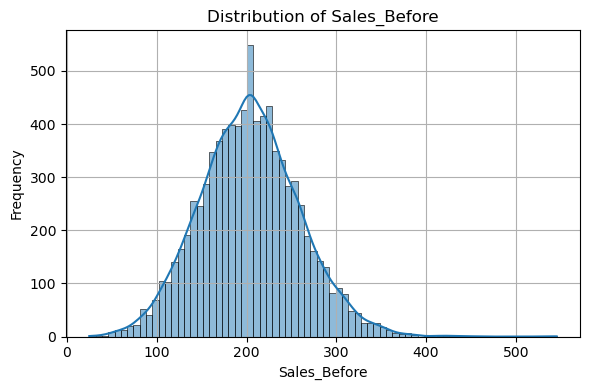

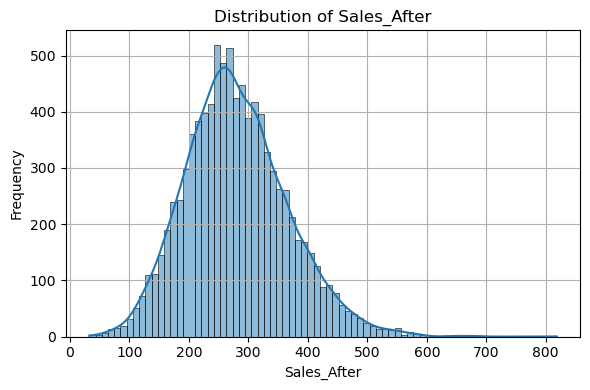

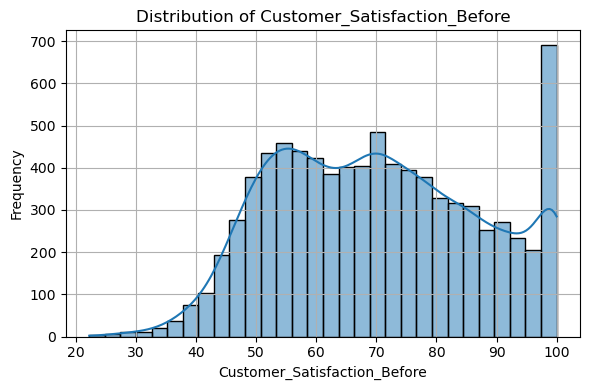

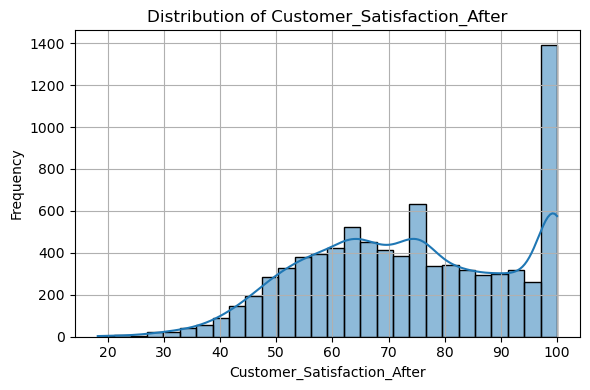

In [6]:
columns=['Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']
for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #right skewed 400 500 extended 1st one mediann
    #right skewed 2 one median
    #left skewed
    #left skewed
    

In [7]:
for col in columns:
    df[col]=df[col].fillna(df[col].median())

In [8]:
df.isnull().sum()

Group                           1401
Customer_Segment                1966
Sales_Before                       0
Sales_After                        0
Customer_Satisfaction_Before       0
Customer_Satisfaction_After        0
Purchase_Made                    805
dtype: int64

In [9]:
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,73.844594,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,273.129170,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9995,Treatment,NaN,259.695935,415.181694,88.438776,98.418593,NaN
9996,Control,High Value,186.488285,216.225457,92.261537,100.000000,NaN
9997,Treatment,Low Value,208.107142,322.893351,55.915870,73.844594,No
9998,Treatment,Medium Value,203.323607,431.974901,66.082462,81.274030,No


In [10]:
df.duplicated().sum()

0

In [11]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")
    

Sales_Before: 333 outliers
Sales_After: 200 outliers
Customer_Satisfaction_Before: 7 outliers
Customer_Satisfaction_After: 17 outliers


In [14]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    

In [13]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

Sales_Before: 0 outliers
Sales_After: 0 outliers
Customer_Satisfaction_Before: 0 outliers
Customer_Satisfaction_After: 0 outliers


In [15]:
df["Group"]=df["Group"].fillna(df["Group"].mode()[0])

In [16]:
df["Purchase_Made"]=df['Purchase_Made'].fillna(df['Purchase_Made'].mode()[0])

In [17]:
df.isnull().sum()

Group                              0
Customer_Segment                1966
Sales_Before                       0
Sales_After                        0
Customer_Satisfaction_Before       0
Customer_Satisfaction_After        0
Purchase_Made                      0
dtype: int64

<Axes: xlabel='Sales_Before', ylabel='Count'>

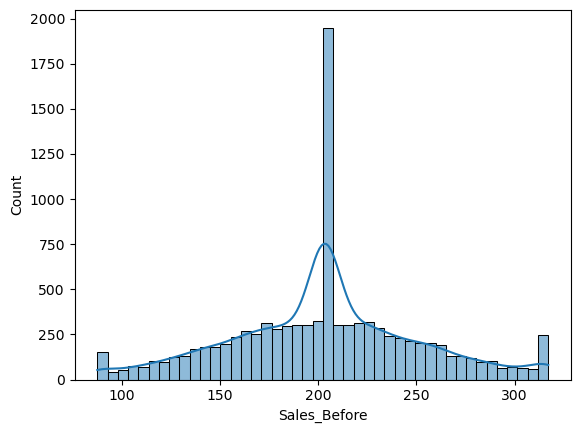

In [18]:
sns.histplot(data=df["Sales_Before"],kde=True)

<Axes: xlabel='Sales_After', ylabel='Count'>

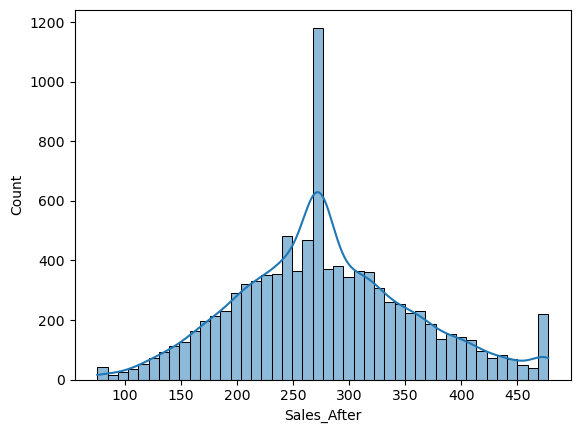

In [19]:
sns.histplot(data=df["Sales_After"],kde=True)

<Axes: xlabel='Customer_Satisfaction_Before', ylabel='Count'>

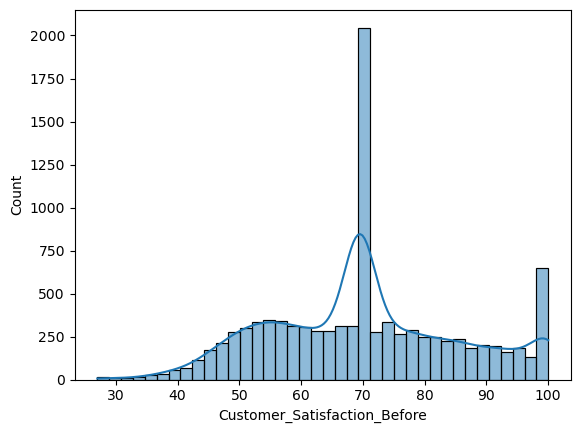

In [20]:
sns.histplot(data=df["Customer_Satisfaction_Before"],kde=True)

<Axes: xlabel='Customer_Satisfaction_After', ylabel='Count'>

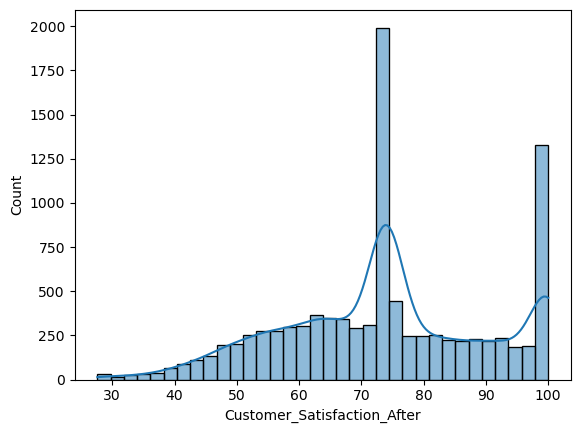

In [21]:
sns.histplot(data=df["Customer_Satisfaction_After"],kde=True)

In [22]:
df['Group'].value_counts()

Group
Control      5701
Treatment    4299
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Group'>

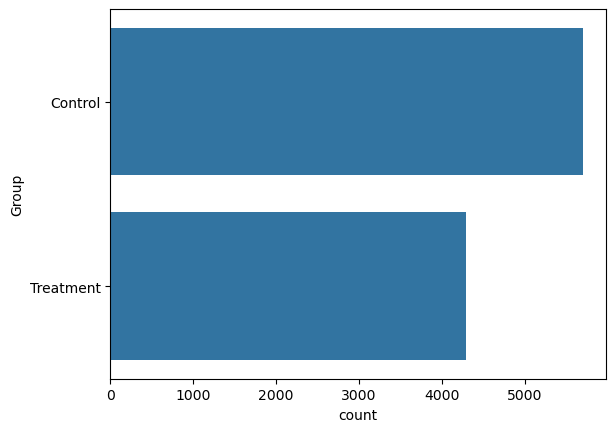

In [23]:
sns.countplot(df["Group"])

<Axes: xlabel='Sales_Before', ylabel='Sales_After'>

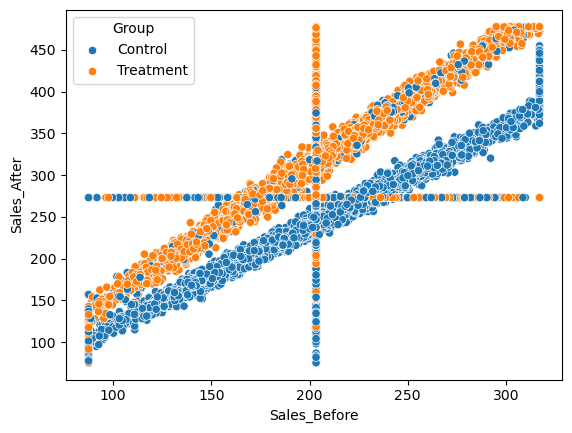

In [24]:
sns.scatterplot(x="Sales_Before",y="Sales_After",hue="Group",data=df)

<Axes: xlabel='Customer_Satisfaction_Before', ylabel='Customer_Satisfaction_After'>

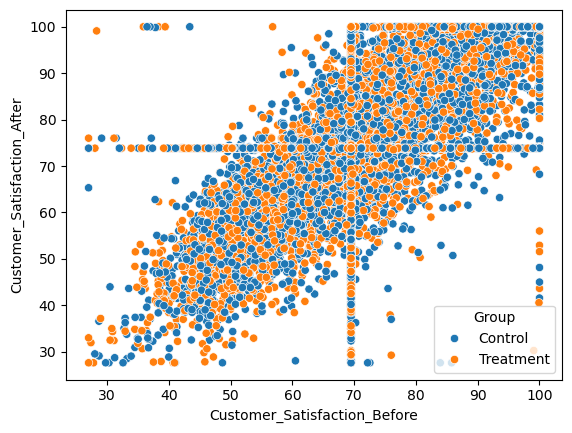

In [25]:
sns.scatterplot(x="Customer_Satisfaction_Before",y="Customer_Satisfaction_After",hue="Group",data=df)